# Building a Columnar Neural Network From Scratch Using Only NumPy and Pandas, and Testing On Image Classification Tasks
This is a purely academic exercise to build a neural network from scratch that can work with columnar data, using only base Python, Pandas, and NumPy using the Mnist dataset.

# Initialization

In [ ]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
random.seed(42)

In [ ]:
data = pd.read_csv('./fashion_data.csv')

First we'll shuffle the mnist dataset and transpose it to the column-wise format for this challenge.

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:400].T
Y_dev = data_dev[-1]
X_dev = data_dev[0:n-1]
X_dev = X_dev / 255.

data_train = data[400:m].T
Y_train = data_train[-1]
X_train = data_train[0:n-1]
X_train = X_train / 255.
_,m_train = X_train.shape

## Building the network

In [ ]:
num_hidden_neurons = 20

### Initialize the parameters in the neural network
Based on the figure above, we need the weight and bias matrices.  
W1, b1 are the matrices for the first layer  
W2, b2 are the matrices for the second layer  

In [ ]:

def init_params():
    W1 = np.random.uniform(-0.5, 0.5, (num_hidden_neurons, X_train.shape[0]))
    b1 = np.zeros(num_hidden_neurons)
    W2 = np.random.uniform(-0.5, 0.5, (len(np.unique(Y_train)), num_hidden_neurons))
    b2 = np.zeros(len(np.unique(Y_train)))
    return W1, b1, W2, b2

### Implementing the non-linearity functions and derivatives

In [ ]:
def ReLU(Z):
    Z = np.where(Z < 0, 0, Z)
    return Z

def ReLU_deriv(Z):
    Z = np.where(Z < 0, 0, 1)
    return Z

def softmax(Z):
    z = Z.T
    s = np.max(z, axis=1)
    s = s[:, np.newaxis]
    e_x = np.exp(z-s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis]
    A = e_x / div
    A = A.T
    return A

### Implementing the forward propagation function
In this forward propagation function, the inputs are in X.

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X) + b1.reshape(num_hidden_neurons,1)
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2.reshape(10, 1)
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

### Implementing the backward propagation function
Calculus for the backward propagation function below is covered in great detail by 3Blue1Brown here: https://www.3blue1brown.com/lessons/backpropagation-calculus

In [ ]:
def one_hot(Y):
    one_hot_Y = np.zeros((len(Y), 10))
    i = 0
    for y in Y:
        idx = y
        one_hot_Y[i][idx] = 1
        i += 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = (A2 - one_hot_Y)
    dW2 = np.dot(dZ2, A1.T) / len(Y)
    db2 = np.sum(dZ2, axis=1) / len(Y)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = np.dot(dZ1, X.T) / len(Y)
    db1 = np.sum(dZ1, axis=1) / len(Y)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1 # W1 changed by dW1
    b1 = b1 - alpha * db1 # b1 changed by db1
    W2 = W2 - alpha * dW2 # W2 changed by dW2
    b2 = b2 - alpha * db2 # b2 changed by db2
    return W1, b1, W2, b2

### Implementing gradient descent
Batching is beyond the scope of this project.

In [ ]:
def get_predictions(A2):
    res = np.argmax(A2, axis=0)
    return res

def get_accuracy(predictions, Y):
    res = np.mean(predictions == Y)
    return res

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
0.125
Iteration:  10
0.350625
Iteration:  20
0.47
Iteration:  30
0.5575
Iteration:  40
0.609375
Iteration:  50
0.646875
Iteration:  60
0.668125
Iteration:  70
0.6875
Iteration:  80
0.695625
Iteration:  90
0.690625
Iteration:  100
0.7075
Iteration:  110
0.7175
Iteration:  120
0.73125
Iteration:  130
0.731875
Iteration:  140
0.735
Iteration:  150
0.7425
Iteration:  160
0.7475
Iteration:  170
0.753125
Iteration:  180
0.75625
Iteration:  190
0.760625
Iteration:  200
0.764375
Iteration:  210
0.76625
Iteration:  220
0.7675
Iteration:  230
0.771875
Iteration:  240
0.775
Iteration:  250
0.780625
Iteration:  260
0.785625
Iteration:  270
0.78875
Iteration:  280
0.79125
Iteration:  290
0.793125
Iteration:  300
0.794375
Iteration:  310
0.795
Iteration:  320
0.794375
Iteration:  330
0.795625
Iteration:  340
0.799375
Iteration:  350
0.8025
Iteration:  360
0.805
Iteration:  370
0.806875
Iteration:  380
0.810625
Iteration:  390
0.811875
Iteration:  400
0.813125
Iteration:  410
0.81625
It

### Checking validation set performance:

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [19]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

np.float64(0.82)

### Exploring some samples

Prediction:  [1]
Label:  1


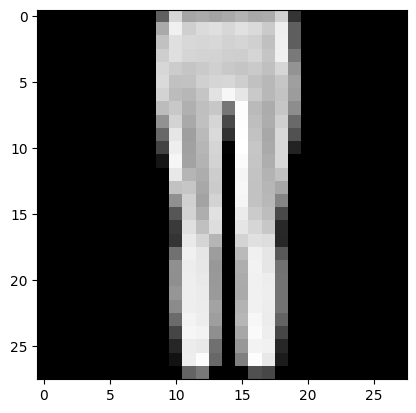

Prediction:  [8]
Label:  8


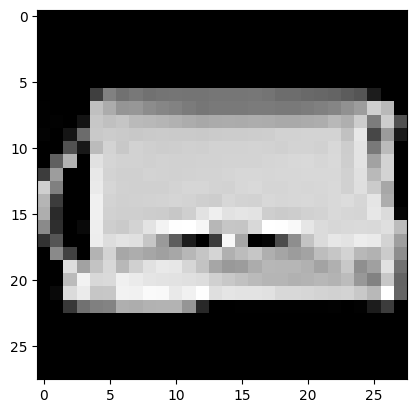

Prediction:  [6]
Label:  6


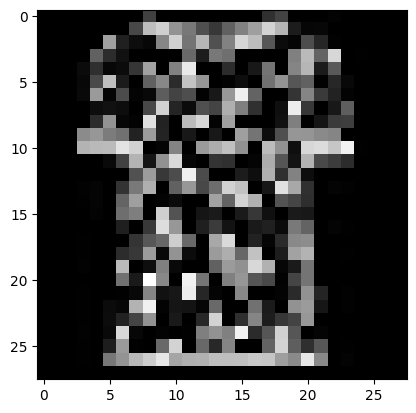

Prediction:  [0]
Label:  0


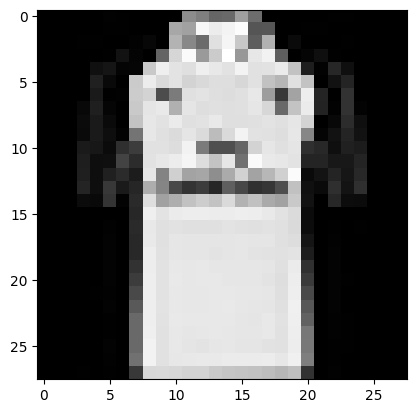

In [20]:
def test_prediction(index, W1, b1, W2, b2): # don't have to make any changes to this code.
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(50, W1, b1, W2, b2)

# Error Analysis and Performance Improvements

### Error Analysis

#### First we'll do a confusion matrix to establish some baseline performance indicators, in addition to the accuracy $0.75$ established above.

              precision    recall  f1-score   support

           0       0.87      0.76      0.81        45
           1       0.91      1.00      0.96        32
           2       0.72      0.77      0.74        43
           3       0.94      0.88      0.91        50
           4       0.82      0.53      0.65        43
           5       0.80      0.83      0.81        29
           6       0.45      0.66      0.53        35
           7       0.93      0.86      0.89        29
           8       0.92      0.96      0.94        46
           9       0.94      0.96      0.95        48

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.84      0.82      0.82       400



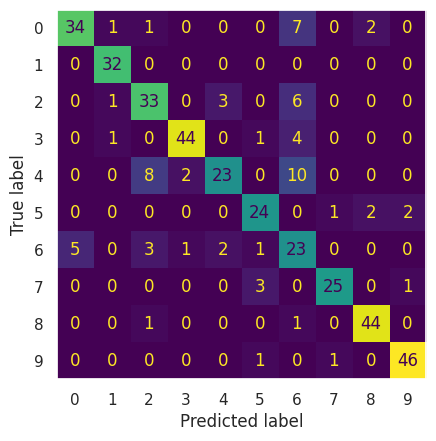

In [ ]:
from sklearn.metrics import (classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay,
                             accuracy_score, 
                             precision_score, 
                             recall_score, 
                             roc_auc_score,
                             roc_curve)
import seaborn as sns

sns.set_theme(style='dark', palette = 'viridis')
def display_classification_confusion_auc(y_true, y_pred):
    print(classification_report(y_true= y_true, y_pred= y_pred))
    ConfusionMatrixDisplay.from_predictions(y_true= y_true, y_pred= y_pred, colorbar= False)
    plt.show()
    return None

display_classification_confusion_auc(Y_dev, dev_predictions)

## Section I | Tuning $\alpha$
#### Next we'll adjust the gradient_descent() function to allow for plotting accuracy graphs based on various measures, and to allow for implementation of $\alpha$ decay.

In [22]:
### Add validation set to epoch to determine per-epoch accuracy ###

def gradient_descent_w_val(X, Y, alpha, iterations, X_dev, Y_dev, decay=0):
    W1, b1, W2, b2 = init_params()
    data = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        if decay > 0 and i % 10 == 0:
            alpha = alpha * decay ** (i / iterations)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            train_acc = get_accuracy(predictions, Y)
            dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
            val_acc = get_accuracy(dev_predictions, Y_dev)
            new_data = [i, train_acc, val_acc]
            data.append(new_data)
    df = pd.DataFrame(data, columns = ['epoch', 'train_acc', 'val_acc'])
    return W1, b1, W2, b2, df

W1, b1, W2, b2, df = gradient_descent_w_val(X_train, Y_train, 0.10, 500, X_dev, Y_dev)

### Here we'll run the baseline model as it was originally implemented. For simplicity, we will focus on accuracy of the validation set, ignoring loss.

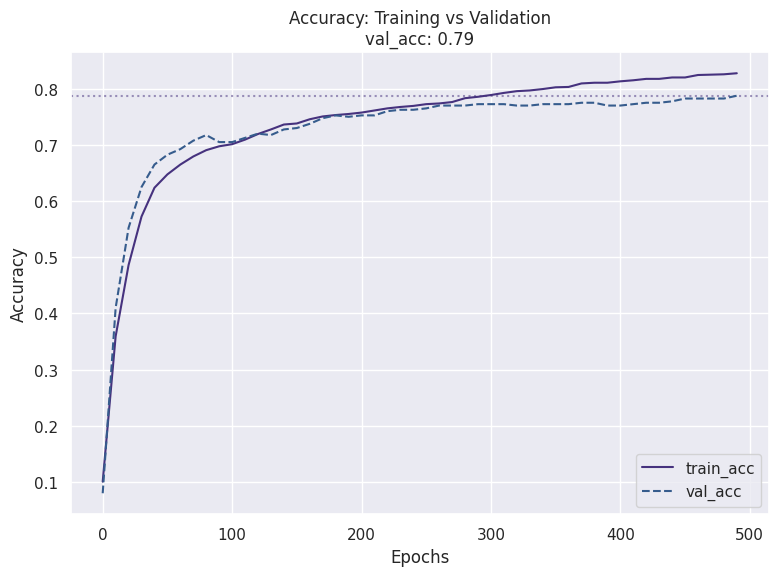

In [23]:
sns.set_theme(style='darkgrid', palette='viridis')
fig, ax = plt.subplots(figsize=(9, 6))
ax.axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
ax.set_title(f'Accuracy: Training vs Validation\nval_acc: {np.max(df["val_acc"]):.2f}')
ax.plot('epoch', 'train_acc', data=df)
ax.plot('epoch', 'val_acc', data=df, linestyle='--')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

#### The baseline model looks like it may still trying to learn after 500 epochs. It appears to be underfitting slightly. So, we'll try adjusting $\alpha$ to see if we can tune the model to learn faster, and also try decaying $\alpha$ so the model learns faster in earlier epochs but has an opportunity to hone in on a minimum with smaller values for $\alpha$ in later epochs.

Alphas to try:  [0.25 0.37 0.49 0.61 0.73 0.85]


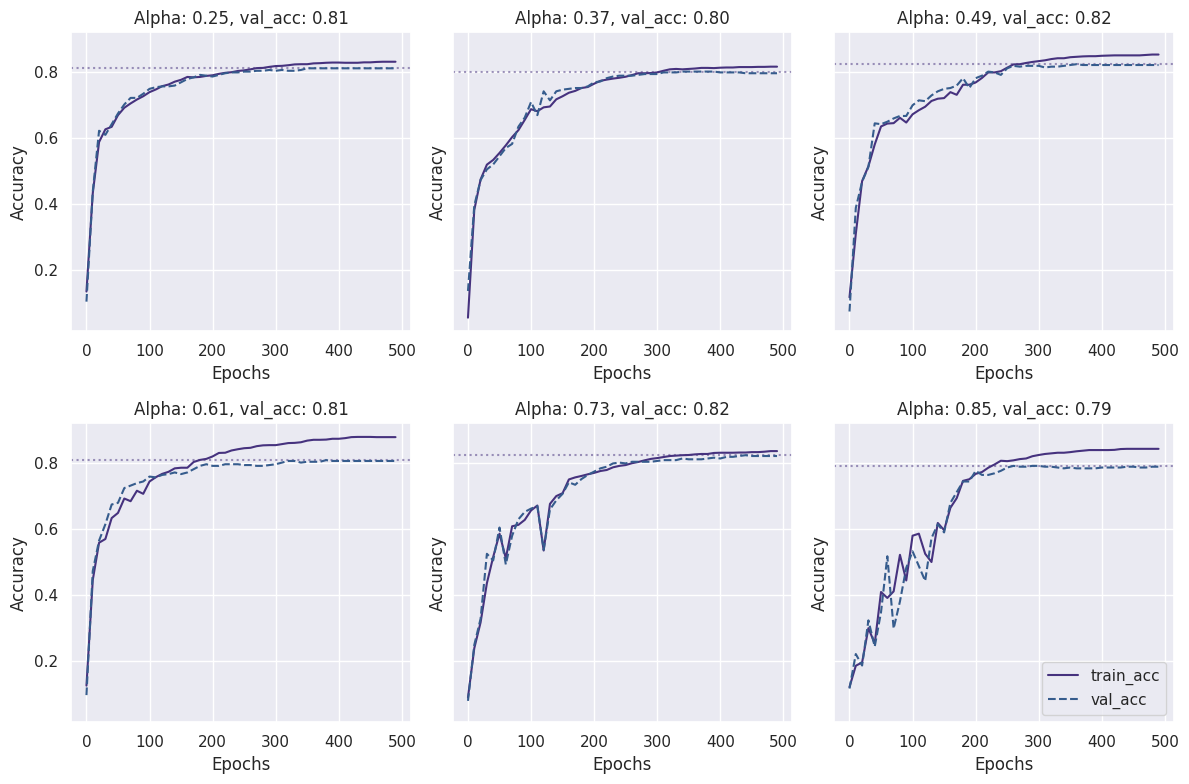

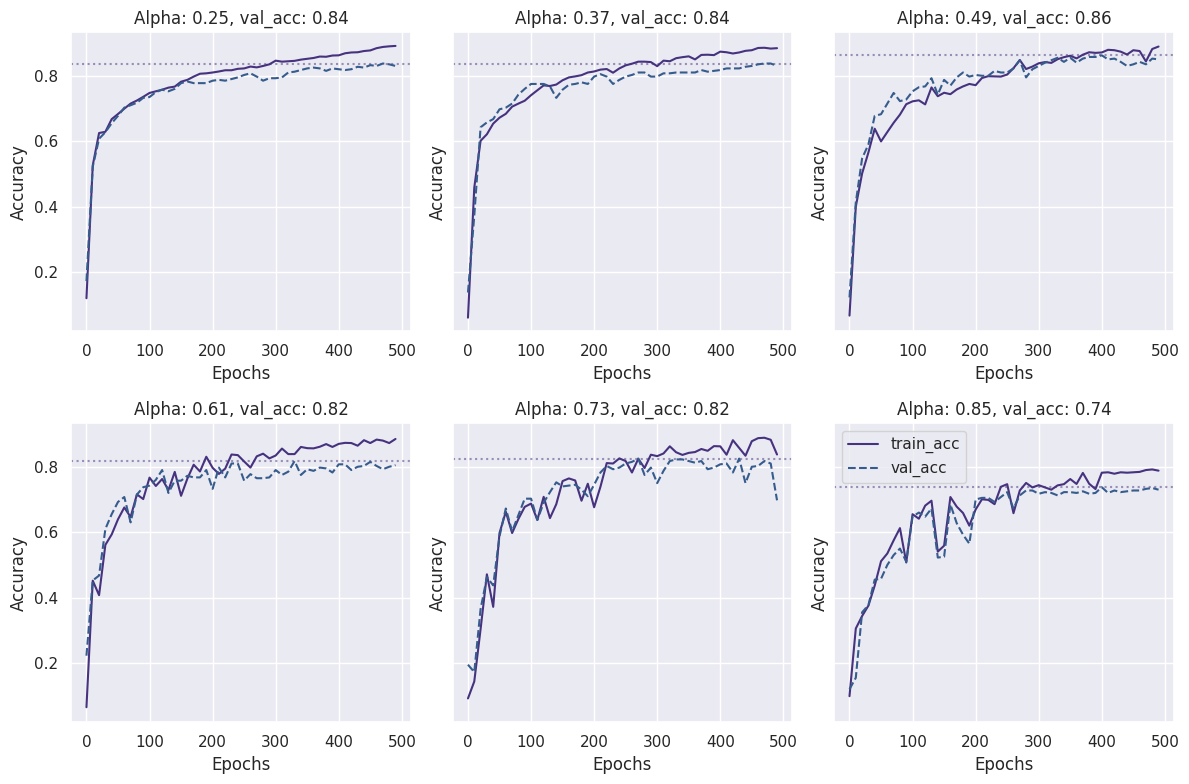

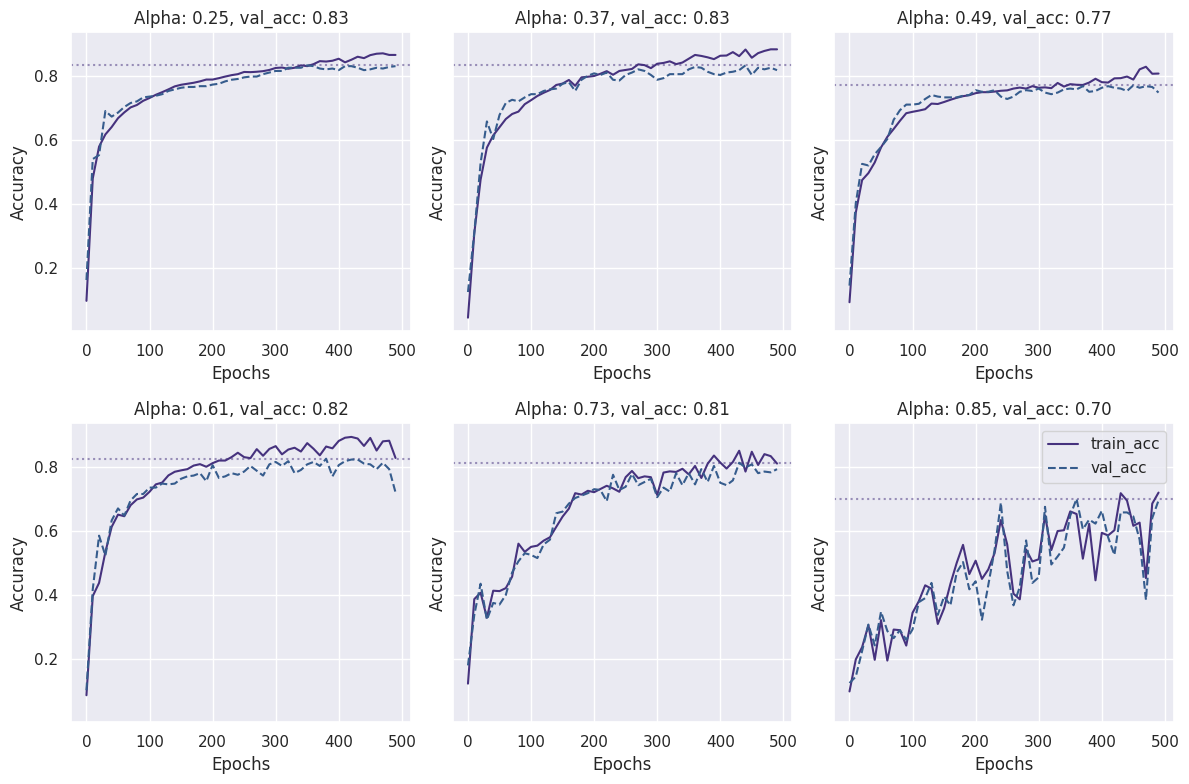

In [ ]:
alphas = np.linspace(.25, .85, 6)
print('Alphas to try: ', alphas)

### Plots for 0.9 decay rate. ###
print('Decay rate: 0.9')
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
ax = ax.ravel()
for i, alpha in enumerate(alphas):
    W1, b1, W2, b2, df = gradient_descent_w_val(X_train, Y_train, alpha, 500, X_dev, Y_dev, decay=0.9)
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Alpha: {round(alpha, 2)}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()


### Plots for 0.99 decay rate. ###
print('Decay rate: 0.99')
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
ax = ax.ravel()
for i, alpha in enumerate(alphas):
    W1, b1, W2, b2, df = gradient_descent_w_val(X_train, Y_train, alpha, 500, X_dev, Y_dev, decay=0.99)
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Alpha: {round(alpha, 2)}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()

### Plots for 0.999 decay rate. ###
print('Decay rate: 0.999')
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
ax = ax.ravel()
for i, alpha in enumerate(alphas):
    W1, b1, W2, b2, df = gradient_descent_w_val(X_train, Y_train, alpha, 500, X_dev, Y_dev, decay=0.999)
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Alpha: {round(alpha, 2)}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()

#### The best combination of $\alpha$ and decay seems to be around $(0.49, 0.99)$, respectively. This model *still* appears to be underfitting even with the larger starting value for $\alpha$. We'll try this model with 1,000 epochs. We're also seeing the best stability and parameters around, so we'll hone in a search from our originally value for $\alpha$ through the end of this range.

Alphas to try:  [0.01  0.128 0.246 0.364 0.482 0.6  ]
Decay rate: 0.99


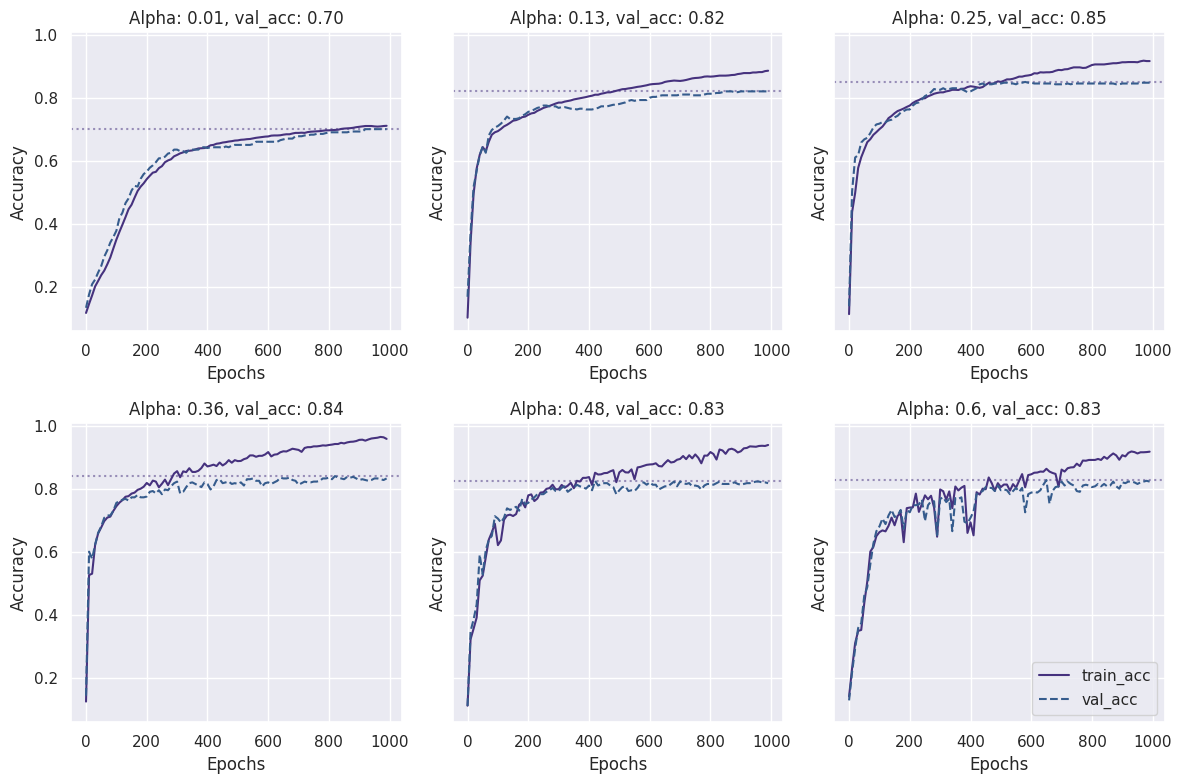

In [30]:
alphas = np.linspace(.01, .6, 6)
print('Alphas to try: ', alphas)
print('Decay rate: 0.99')
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
ax = ax.ravel()
for i, alpha in enumerate(alphas):
    W1, b1, W2, b2, df = gradient_descent_w_val(X_train, Y_train, alpha, 1000, X_dev, Y_dev, decay=0.99)
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Alpha: {round(alpha, 2)}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()

### We are not really seeing any improvements after around 500 epochs. We'll move forward with our best model from the previous iteration, that is, $\alpha = 0.49$, decay $=0.99$, and epochs $= 500$.

              precision    recall  f1-score   support

           0       0.71      0.76      0.73        45
           1       0.89      1.00      0.94        32
           2       0.68      0.74      0.71        43
           3       0.90      0.88      0.89        50
           4       0.71      0.79      0.75        43
           5       0.80      0.97      0.88        29
           6       0.67      0.34      0.45        35
           7       0.93      0.90      0.91        29
           8       0.98      0.93      0.96        46
           9       0.98      0.96      0.97        48

    accuracy                           0.83       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.83      0.83      0.82       400



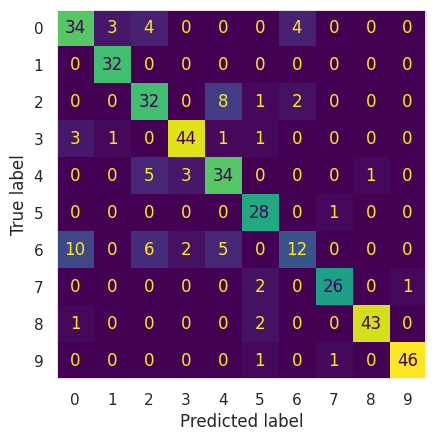


Originals for Comparison

Iteration:  0
0.055
Iteration:  10
0.396875
Iteration:  20
0.505
Iteration:  30
0.55625
Iteration:  40
0.58375
Iteration:  50
0.614375
Iteration:  60
0.635
Iteration:  70
0.6475
Iteration:  80
0.660625
Iteration:  90
0.6725
Iteration:  100
0.686875
Iteration:  110
0.696875
Iteration:  120
0.701875
Iteration:  130
0.709375
Iteration:  140
0.715
Iteration:  150
0.72375
Iteration:  160
0.726875
Iteration:  170
0.733125
Iteration:  180
0.730625
Iteration:  190
0.72375
Iteration:  200
0.73
Iteration:  210
0.743125
Iteration:  220
0.74625
Iteration:  230
0.753125
Iteration:  240
0.756875
Iteration:  250
0.76125
Iteration:  260
0.764375
Iteration:  270
0.76875
Iteration:  280
0.773125
Iteration:  290
0.775
Iteration:  300
0.77625
Iteration:  310
0.778125
Iteration:  320
0.781875
Iteration:  330
0.783125
Iteration:  340
0.786875
Iteration:  350
0.789375
Iteration:  360
0.791875
Iteration:  370
0.795625
Iteration:  380
0.796875
Iteration:  390
0.800625
Iteration:  400

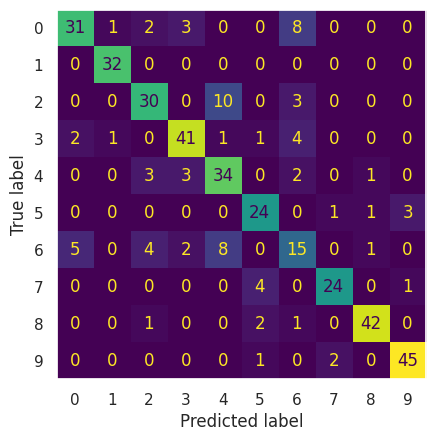

In [31]:
sns.set_theme(style='dark', palette = 'viridis')
W1, b1, W2, b2 = gradient_descent_w_val(X_train, Y_train, 0.49, 500, X_dev, Y_dev, decay=0.99)[0:4]
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)
display_classification_confusion_auc(Y_dev, dev_predictions)

print('\nOriginals for Comparison\n')
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)
display_classification_confusion_auc(Y_dev, dev_predictions)


### For easy comparison, the precision, recall, and f1 for each category is displayed.
#### $\alpha$ = 0.49, decay $=0.99$, epochs $=500$:
                  precision    recall  f1-score   support

               0       0.71      0.76      0.73        45
               1       0.89      1.00      0.94        32
               2       0.68      0.74      0.71        43
               3       0.90      0.88      0.89        50
               4       0.71      0.79      0.75        43
               5       0.80      0.97      0.88        29
               6       0.67      0.34      0.45        35
               7       0.93      0.90      0.91        29
               8       0.98      0.93      0.96        46
               9       0.98      0.96      0.97        48

         accuracy                          0.83       400
         macro avg     0.82      0.83      0.82       400
      weighted avg     0.83      0.83      0.82       400



#### Original output ($\alpha=0.1$, no decay, epochs $=500$)


                  precision    recall  f1-score   support

               0       0.82      0.69      0.75        45
               1       0.94      1.00      0.97        32
               2       0.75      0.70      0.72        43
               3       0.84      0.82      0.83        50
               4       0.64      0.79      0.71        43
               5       0.75      0.83      0.79        29
               6       0.45      0.43      0.44        35
               7       0.89      0.83      0.86        29
               8       0.93      0.91      0.92        46
               9       0.92      0.94      0.93        48

         accuracy                          0.80       400
         macro avg     0.79      0.79      0.79       400
      weighted avg     0.80      0.80      0.79       400

#### Tuning $\alpha$, decay, and epochs seems to yield marginal performance. Overall accuracy has increased 3 points, however precision, recall, and F1 vary widely within categories. There are other tactics we can try. Hotspots for errors in both models are category swaps at 6-0 and at 4-2. These models are confusing the "T-shirt/top" vs "Shirt" identification and the "Coat" vs "Pullover" identification.

# Adjusting Network Complexity Pt 1: Layer Size
#### Our 20 neurons in one hidden layer is arbitrary. One [heuristic](https://www.heatonresearch.com/2017/06/01/hidden-layers.html) found online suggests a few options for starting point for layer size.
> The number of hidden neurons should be between the size of the input layer and the size of the output layer.  
> The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.  
> The number of hidden neurons should be less than twice the size of the input layer.
#### With such a wide range for potential sizes, we'll try a large number of options. We'll search 12 options across the original layer size to 500 (roughly the outcome of the second option above). 

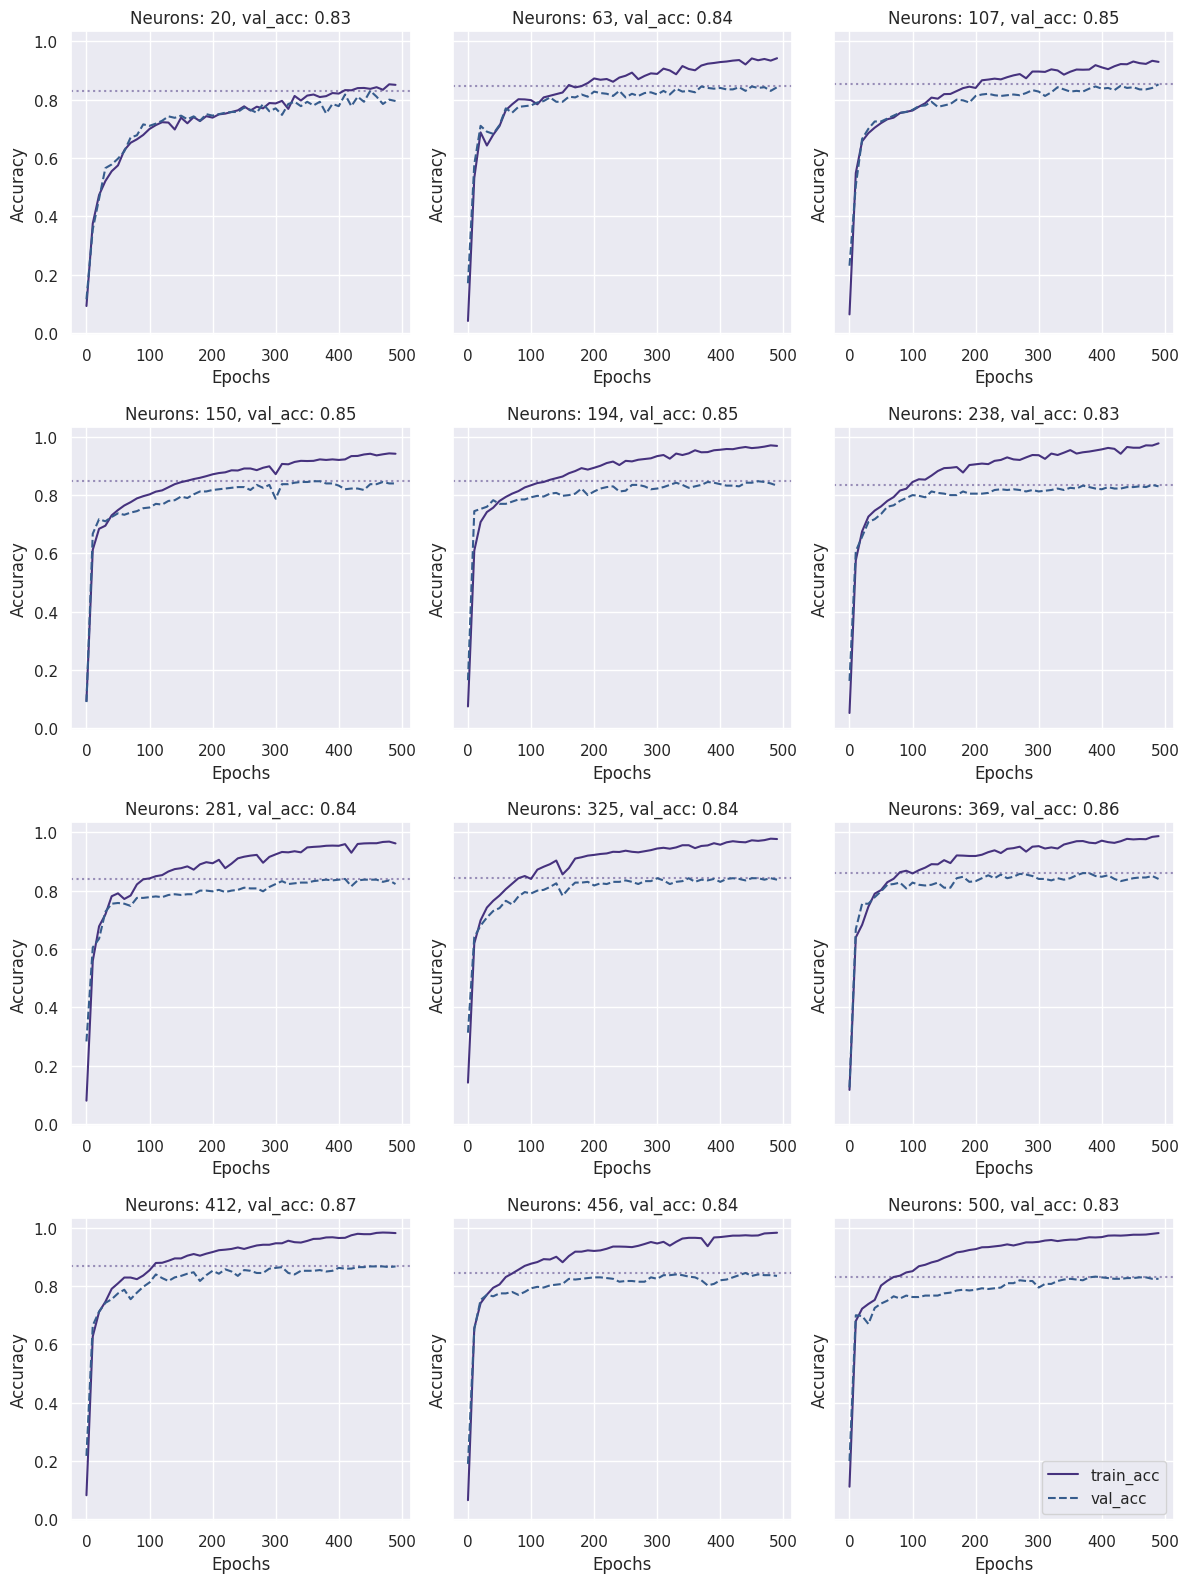

In [34]:
sns.set_theme(style='darkgrid', palette = 'viridis')
num_hidden_neurons = np.linspace(20, 500, 12).astype(int)
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 16), sharey=True)
ax = ax.ravel()
for i, n in enumerate(num_hidden_neurons):
    num_hidden_neurons = n
    W1, b1, W2, b2 = init_params()
    W1, b1, W2, b2, df = gradient_descent_w_val(X_train, Y_train, .49, 500, X_dev, Y_dev, decay=0.99) # hard code best alpha/decay/epoch values from Section I
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Neurons: {n}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()

#### There are very slight improvements in accuracy at 412 neurons, although this could very well be random noise. We'll try one more set centered around some of the best scores above $(369, 412)  \pm \approx 50$.

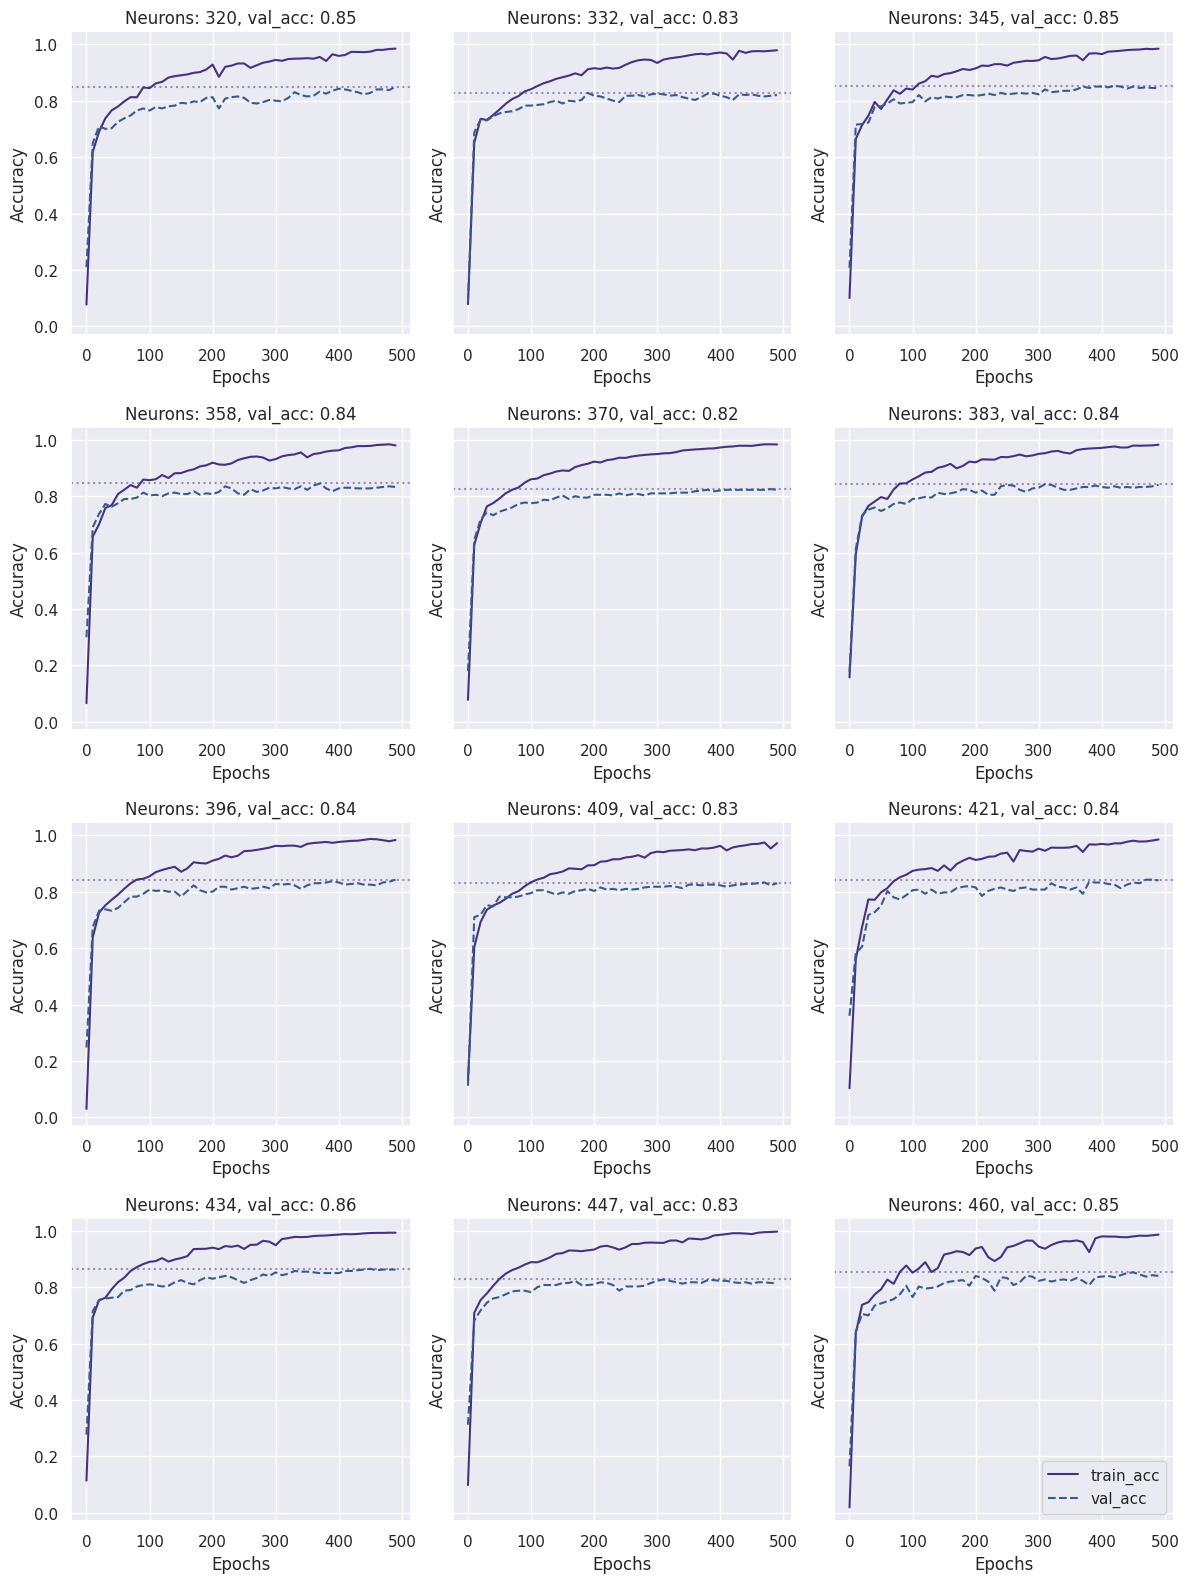

In [35]:
num_hidden_neurons = np.linspace(320, 460, 12).astype(int)
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 16), sharey=True)
ax = ax.ravel()
for i, n in enumerate(num_hidden_neurons):
    num_hidden_neurons = n
    W1, b1, W2, b2 = init_params()
    W1, b1, W2, b2, df = gradient_descent_w_val(X_train, Y_train, .49, 500, X_dev, Y_dev, decay=0.99) # hard code best alpha/decay/epoch values from Section I
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Neurons: {n}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()

#### These results don't appear significantly better than the previously selected model with 20 neurons. Given the reduced complexity of this smaller model with similar results, we'll continue with that model.

# Adjusting Network Complexity Pt 2: Quantity of Hidden Layers
#### Adjusting network depth does not appear to yield better results. Another option for adjusting network complexity is adding layers. Since the input dataset is image data, it is unlikely that the boundary function could be continuously differentiable. It's highly likely that these boundaries are arbitrarily shaped and may comprise of multiple discontinuous regions. Therefore, adding an additional layer may yield better results than simply increasing the size of one hidden layer.  
First, we'll need to update the original functions to handle an additional layer:

In [36]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = (A3 - one_hot_Y)
    dW3 = np.dot(dZ3, A2.T) / len(Y)
    db3 = np.sum(dZ3, axis=1) / len(Y)
    dZ2 = np.dot(W3.T, dZ3) * ReLU_deriv(Z2)
    dW2 = np.dot(dZ2, A1.T) / len(Y)
    db2 = np.sum(dZ2, axis=1) / len(Y)
    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = np.dot(dZ1, X.T) / len(Y)
    db1 = np.sum(dZ1, axis=1) / len(Y)

    return dW1, db1, dW2, db2, dW3, db3

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = np.dot(W1, X) + b1.reshape(num_hidden_neurons, 1)
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2.reshape(num_hidden_neurons, 1)
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3.reshape(10, 1)
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3

def init_params():
    W1 = np.random.uniform(-0.5, 0.5, (num_hidden_neurons, X_train.shape[0]))
    b1 = np.zeros(num_hidden_neurons)
    W2 = np.random.uniform(-0.5, 0.5, (num_hidden_neurons, num_hidden_neurons))
    b2 = np.zeros(num_hidden_neurons)
    W3 = np.random.uniform(-0.5, 0.5, (len(np.unique(Y_train)), num_hidden_neurons))
    b3 = np.zeros(len(np.unique(Y_train)))
    return W1, b1, W2, b2, W3, b3

def gradient_descent_w_val(X, Y, alpha, iterations, X_dev, Y_dev, decay=0):
    W1, b1, W2, b2, W3, b3 = init_params()
    data = []
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        if decay > 0:
            alpha = alpha * decay ** (i / iterations)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A3)
            train_acc = get_accuracy(predictions, Y)
            dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
            val_acc = get_accuracy(dev_predictions, Y_dev)
            data.append([i, train_acc, val_acc])
    df = pd.DataFrame(data, columns=['epoch', 'train_acc', 'val_acc'])
    return W1, b1, W2, b2, W3, b3, df

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2, W3, b3


def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

#### First we'll try our original number of neurons per layer, along with the variability in $\alpha$ to see if the results are better.

[0.25 0.37 0.49 0.61 0.73 0.85]


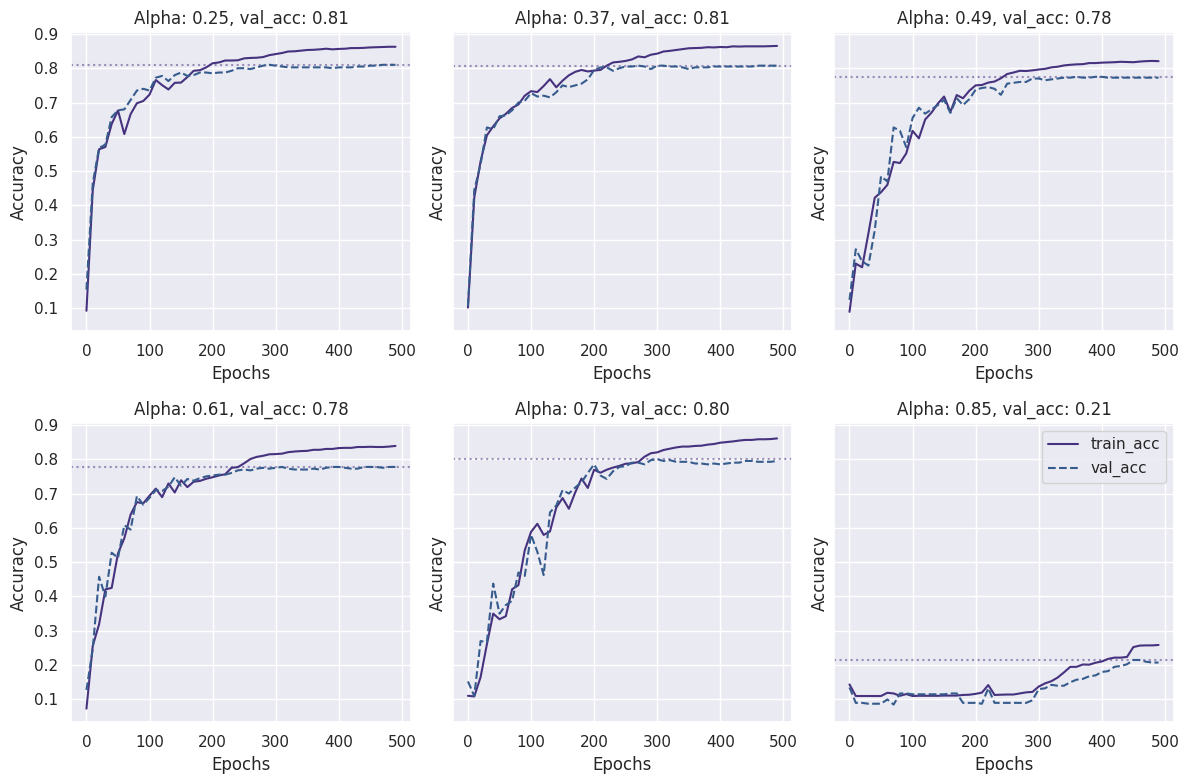

In [37]:
num_hidden_neurons = 20

alphas = np.linspace(.25, .85, 6)
print('Alphas', alphas)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharey=True)
ax = ax.ravel()
for i, alpha in enumerate(alphas):
    W1, b1, W2, b2, W3, b3, df = gradient_descent_w_val(X_train, Y_train, alpha, 500, X_dev, Y_dev, decay=0.99)
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Alpha: {round(alpha, 2)}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()

#### These results are much rorse than the original. We'll try one last time combining our efforts from Part I, Part II, and Part III. We'll try a large array of neurons across the two layers to see if any of these yield better results.

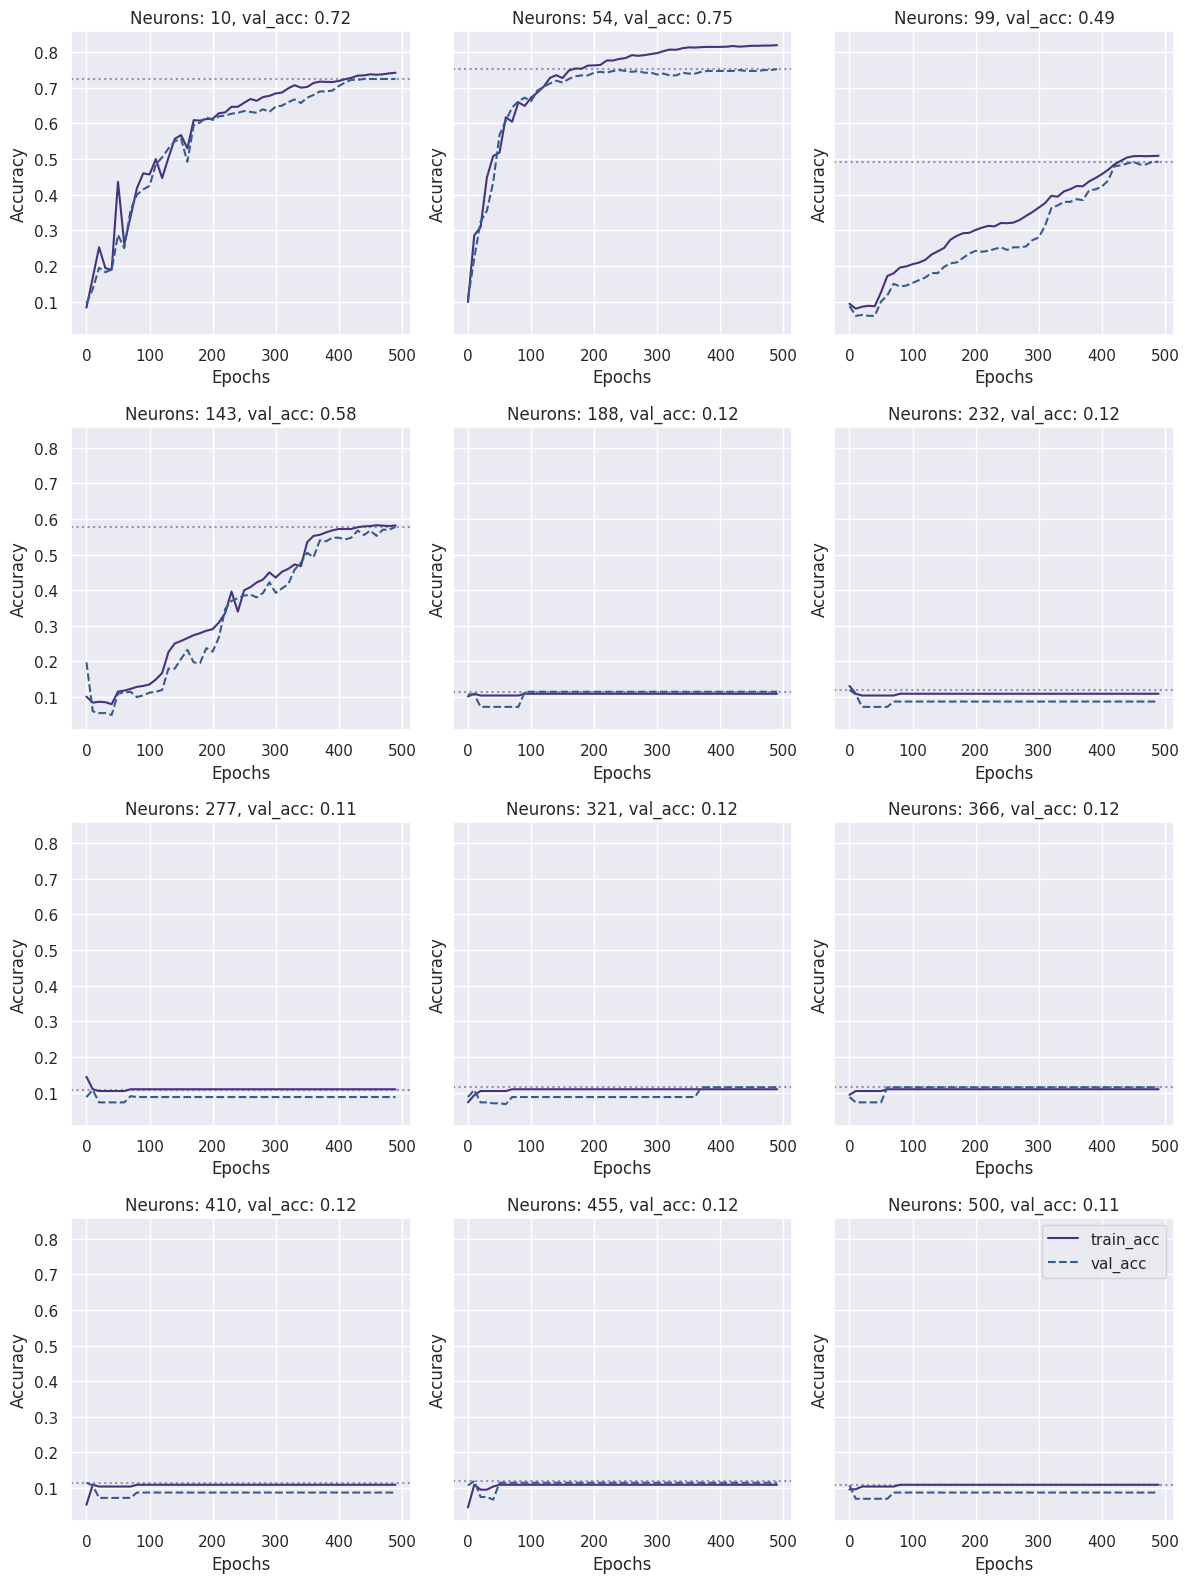

In [39]:
num_hidden_neurons = np.linspace(10, 500, 12).astype(int)
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 16), sharey=True)
ax = ax.ravel()
for i, n in enumerate(num_hidden_neurons):
    num_hidden_neurons = n
    W1, b1, W2, b2, W3, b3 = init_params()
    W1, b1, W2, b2, W3, b3, df = gradient_descent_w_val(X_train, Y_train, .49, 500, X_dev, Y_dev, decay=0.99) # hard code best alpha/decay/epoch values from Section I
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Neurons: {n}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()

#### We'll try one more, with a smaller range.

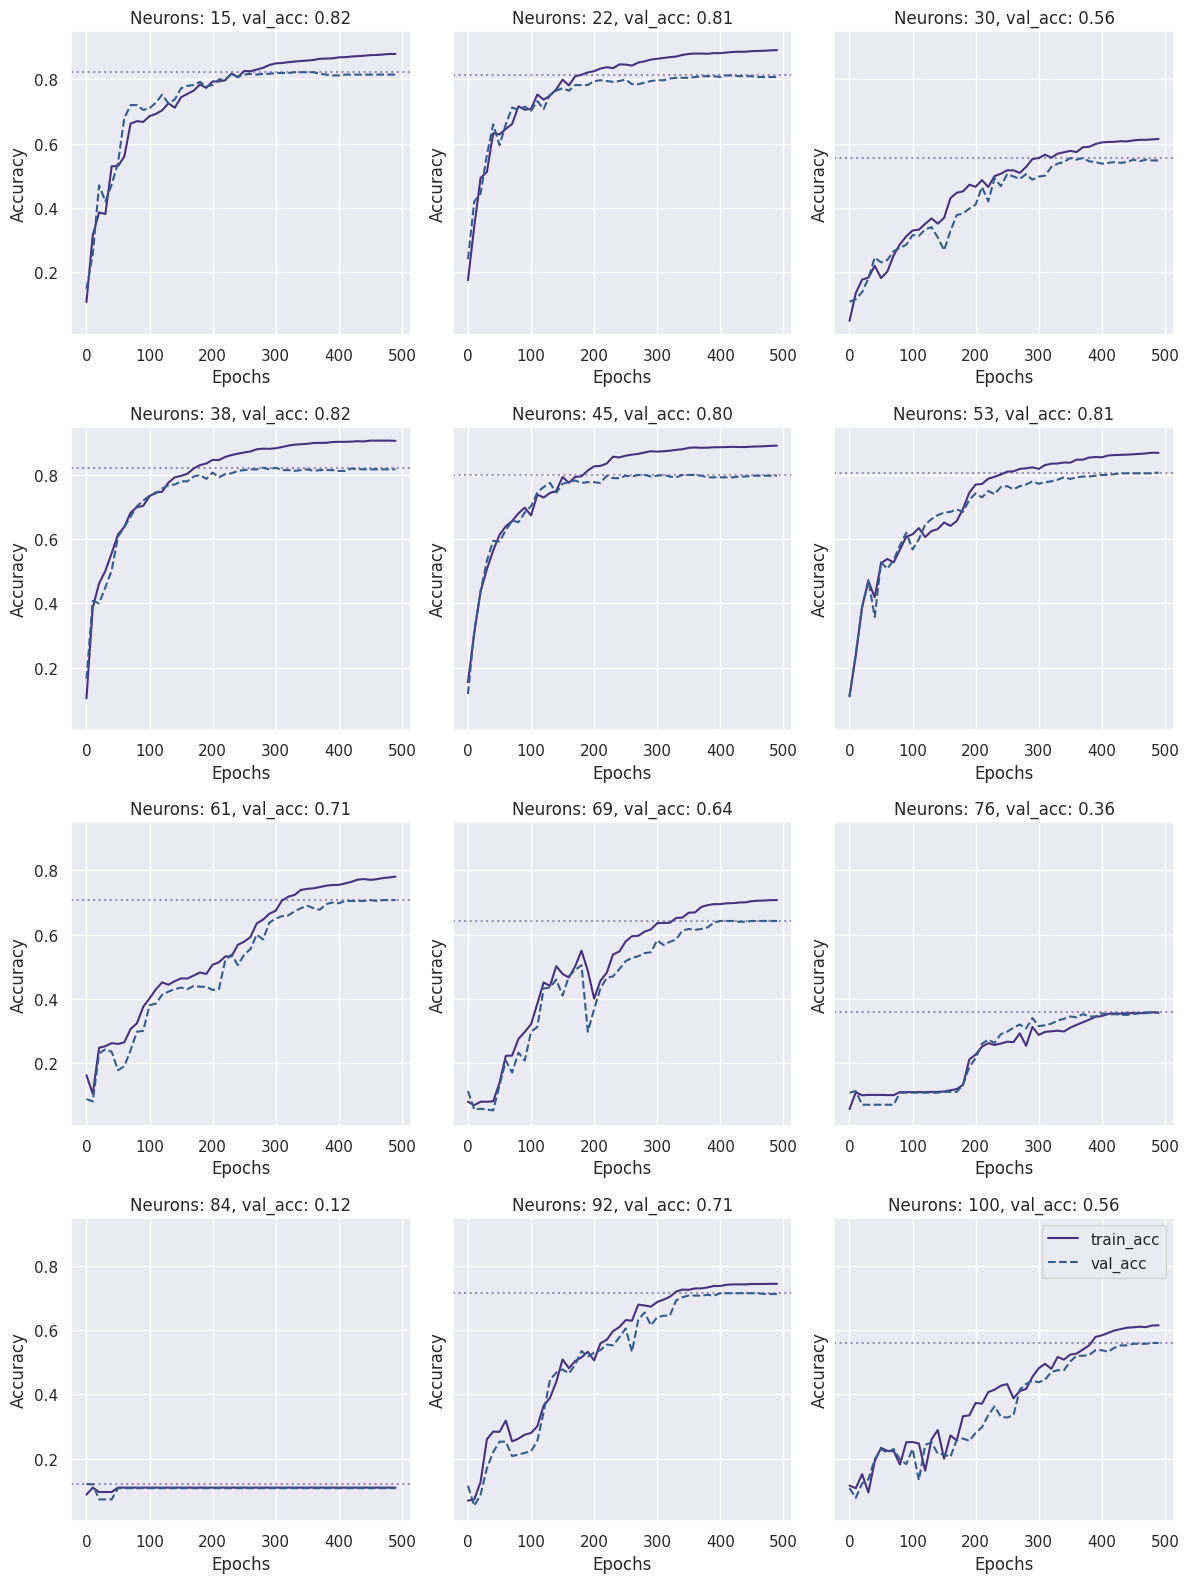

In [40]:
num_hidden_neurons = np.linspace(15, 100, 12).astype(int)
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 16), sharey=True)
ax = ax.ravel()
for i, n in enumerate(num_hidden_neurons):
    num_hidden_neurons = n
    W1, b1, W2, b2, W3, b3 = init_params()
    W1, b1, W2, b2, W3, b3, df = gradient_descent_w_val(X_train, Y_train, .49, 500, X_dev, Y_dev, decay=0.99) # hard code best alpha/decay/epoch values from Section I
    ax[i].axhline(y=np.max(df['val_acc']), linestyle=':', alpha=0.5)
    ax[i].plot('epoch', 'train_acc', data=df)
    ax[i].plot('epoch', 'val_acc', data=df, linestyle='--')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].set_title(f'Neurons: {n}, val_acc: {np.max(df["val_acc"]):.2f}')
plt.tight_layout()
plt.legend()
plt.show()

# Conclusion
We introduced three attempts to improve network performance.
1. To account for underfitting, $\alpha$ was adjusted in two ways: first it was adjusted to larger values to allow the model to take larger steps in earlier epochs, and then we introduced decay to allow it to converge on minima without "bouncing around".
2. To improve on the arbitrarily selected number of neurons $n=20$, we researched heuristics and found literature that indicated a few formulae for selecting a starting point for layer size. We implemented a search among these values and found that, while some larger layer sizes improved the model's performance marginally, it was not consistent or valuable given the significant increase in complexity.
3. Finally, to account for the potential non-differentiability and/or discontiniguous boundary shapes of image data, we attempted to increase the number of layers, using our best $\alpha$ and decay from step 1. These layers collapsed quickly.
The first set of changes appeared to marginally improve on the original model. Further improvements should focus on specific engineering to account for the individual category swaps (6-0 and 4-2). The original model with the following changes $\alpha = 0.49$ and decay $=0.99$ was our best model at roughly $0.86$ accuracy.